# Assignment 10

In this assignment, we want to implement **cross-validation** for logistic regression. Cross-validation is a powerful technique for model selection (such as when choosing the right hyper-parameters), especially when the data size is not very large. The goal of this assignment is to first implement cross-validation and then to compare it to a baseline model (with no cross-validation).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore") # warnings.simplefilter("default")
%matplotlib inline
random_state = 0

### Get the data
Read in `AmesFeatures.csv` which contains the processed data from the lecture.  This data file can be found in canvas.  If you want, you can generate this data file yourself by uncommenting the line `# AmesFeatures.to_csv('AmesFeatures.csv', index=False)` in file `Lesson_10_b_Student.ipynb`.  You may need to change the path below.  <br/><span style="color:red" float:right>[0 point]</span>

In [2]:
AmesFeatures = pd.read_csv('AmesFeatures.csv')
y = (AmesFeatures['SalePrice'] > 200000) & (AmesFeatures['SalePrice'] < 230000)
X = AmesFeatures.drop(columns=['Id', 'SalePrice'])
display(y.value_counts())
display(X.shape)
display(X)

SalePrice
False    1330
True      130
Name: count, dtype: int64

(1460, 91)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,953.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1456,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1457,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1458,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,1078.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Use some of the code from the lecture. 
- Split X and y into X_train, X_test, y_train, and y_test using `test_size = 0.30`.  You may want to use `random_state = 0` to make your results the same as others 
- Present the counts for False and True in y_train and y_test to verify the imbalanced data in your train and test sets

<span style="color:red" float:right>[0 point]</span>

In [3]:
# Add code here to splt data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = random_state)
# Add code to present the imbalance of the class labels for both test and training
print(f"Training set has {X_train.shape[0]} rows.\n Testing set has {X_test.shape[0]} rows")

Training set has 1022 rows.
 Testing set has 438 rows


1. Train basic `LogisticRegression` classifier (repeat what was done in class)
    1. Train a model with `X_train` and `y_train`
    2. predict (hard baseline and soft) on training and test features with `.predict()` and `.predict_proba()`
    3. evaluate model using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
    4. evaluate model using ROC and AUC of ROC
    5. comment on the model's usability. 

<span style="color:red" float:right>[2 point]</span>

In [4]:
# Add code here to train the logistic regression\
lreg = LogisticRegression(random_state=random_state)
lreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [5]:
# Add code to predict (hard and soft) on training and test features
y_train_pred_hard = lreg.predict(X_train)
y_train_pred_soft = lreg.predict_proba(X_train)
y_test_pred_hard = lreg.predict(X_test)
y_test_pred_soft = lreg.predict_proba(X_test)

In [6]:
# Add code to evaluate predictions using confusion matrix and its metrics
print(f"Training accuracy score: {accuracy_score(y_train,y_train_pred_hard) * 100:.4f}")
print(f"Training confusion matrix:\n{confusion_matrix(y_train,y_train_pred_hard)}")
print(f"Test accuracy score: {accuracy_score(y_test,y_test_pred_hard) * 100:.4f}")
print(f"Test confusion matrix:\n{confusion_matrix(y_test,y_test_pred_hard)}")

Training hard accuracy score: 90.9980
Training soft confusion matrix:
[[930   0]
 [ 92   0]]
Test hard accuracy score: 91.3242
Test soft confusion matrix:
[[400   0]
 [ 38   0]]


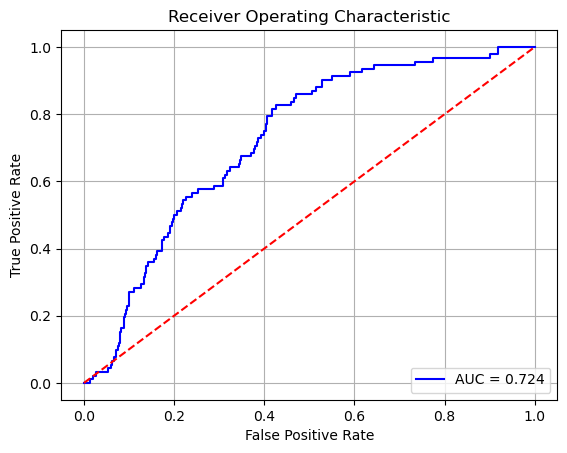

In [7]:
# Add code to evaluate predictions using ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_soft[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

#### Add Comment on usability


2. Train `LogisticRegression` with balanced class weights 
    1. Read the documentation to see what `class_weight` does
    2. Train a new model with the same `X_train` and `y_train` settting `class_weight` so the weights are balanced
    3. predict (hard and soft) on training and test features with .predict() and .predict_proba()
    4. evaluate model using confusion matrix (confusion_matrix) and its metrics (classification_report)
    5. evaluate model using ROC
    6. How does balancing class weights change any of the results? Why?

<span style="color:red" float:right>[3 point]</span>

In [8]:
# Add code here to train the logistic regression
lreg = LogisticRegression(random_state=random_state, class_weight='balanced')
lreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [9]:
# Add code to predict (hard and soft) on training and test features
y_train_pred_hard = lreg.predict(X_train)
y_train_pred_soft = lreg.predict_proba(X_train)
y_test_pred_hard = lreg.predict(X_test)
y_test_pred_soft = lreg.predict_proba(X_test)

In [10]:
# Add code to evaluate predictions using confusion matrix and its metrics
print(f"Training accuracy score: {accuracy_score(y_train,y_train_pred_hard) * 100:.4f}")
print(f"Training confusion matrix:\n{confusion_matrix(y_train,y_train_pred_hard)}")
print(f"Test accuracy score: {accuracy_score(y_test,y_test_pred_hard) * 100:.4f}")
print(f"Test confusion matrix:\n{confusion_matrix(y_test,y_test_pred_hard)}")

Training hard accuracy score: 69.0802
Training soft confusion matrix:
[[634 296]
 [ 20  72]]
Test hard accuracy score: 68.2648
Test soft confusion matrix:
[[276 124]
 [ 15  23]]


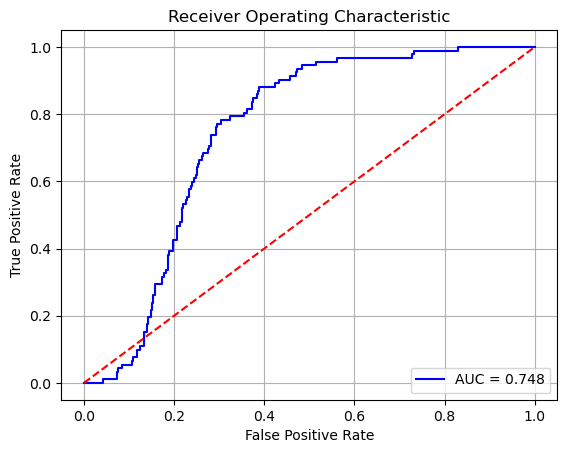

In [11]:
# Add code to evaluate predictions using ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_soft[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

#### Add Comment on the effect of weight balancing


3. Use `LogisticRegressionCV` to train a cross-validation logistic regression.  The CV stands for cross-validation.
   1. train a cross-validation logistic regression
      - Use the same `X_train` and `y_train`.
      - You may want to use `random_state = 0` to make your results the same as others.
      - Set the `cv` parameter to 5.  5 is the default value.
      - Set `class_weight` so the weights are balanced
   2. predict (hard and soft) on training and test features with `.predict()` and `.predict_proba()`
   3. evaluate test and training predictions using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
   4. evaluate test and training predictions using ROC
   5. comment on whether cross-validation makes a difference in the results. 

<span style="color:red" float:right>[3 point]</span>

In [12]:
# Add code here to train the logistic regression
lreg = LogisticRegressionCV(random_state=random_state, cv=5, class_weight='balanced')
lreg.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=5, random_state=0)

In [13]:
# Add code to predict (hard and soft) on training and test features
y_train_pred_hard = lreg.predict(X_train)
y_train_pred_soft = lreg.predict_proba(X_train)
y_test_pred_hard = lreg.predict(X_test)
y_test_pred_soft = lreg.predict_proba(X_test)

In [14]:
# Add code to evaluate predictions using confusion matrix and its metrics
print(f"Training accuracy score: {accuracy_score(y_train,y_train_pred_hard) * 100:.4f}")
print(f"Training confusion matrix:\n{confusion_matrix(y_train,y_train_pred_hard)}")
print(f"Test accuracy score: {accuracy_score(y_test,y_test_pred_hard) * 100:.4f}")
print(f"Test confusion matrix:\n{confusion_matrix(y_test,y_test_pred_hard)}")

Training hard accuracy score: 68.2975
Training soft confusion matrix:
[[624 306]
 [ 18  74]]
Test hard accuracy score: 67.5799
Test soft confusion matrix:
[[268 132]
 [ 10  28]]


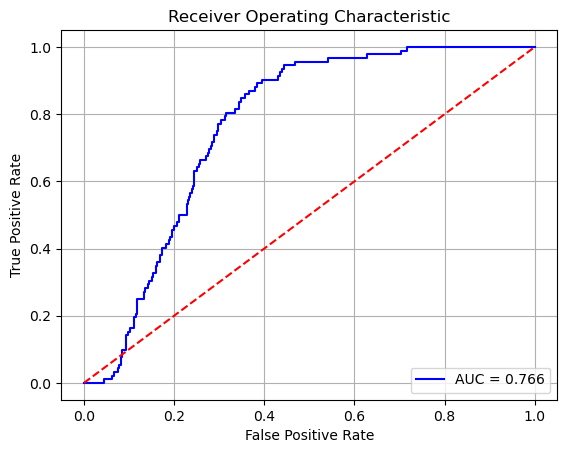

In [15]:
# Add code to evaluate predictions using ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_soft[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

#### Add comments on model evaluation and  cross-validation


4. Increase the number of folds and train the CV model again:
   1. train a cross-validation logistic regression
      - Use the same `X_train` and `y_train`.
      - You may want to use `random_state = 0` to make your results the same as others.
      - Set the `cv` parameter to 10 
      - Set `class_weight` so the weights are balanced
   2. predict (hard and soft) on training and test features with `.predict()` and `.predict_proba()`
   3. evaluate test and training predictions using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
   4. evaluate test and training predictions using ROC
   5. comment on whether cross-validation makes a difference in the results. 

<span style="color:red" float:right>[2 point]</span>

In [16]:
# Add code here to train the logistic regression
lreg = LogisticRegressionCV(random_state=random_state, cv=10, class_weight='balanced')
lreg.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=0)

In [17]:
# Add code to predict (hard and soft) on training and test features
y_train_pred_hard = lreg.predict(X_train)
y_train_pred_soft = lreg.predict_proba(X_train)
y_test_pred_hard = lreg.predict(X_test)
y_test_pred_soft = lreg.predict_proba(X_test)

In [18]:
# Add code to evaluate predictions using confusion matrix and its metrics
print(f"Training accuracy score: {accuracy_score(y_train,y_train_pred_hard) * 100:.4f}")
print(f"Training confusion matrix:\n{confusion_matrix(y_train,y_train_pred_hard)}")
print(f"Test accuracy score: {accuracy_score(y_test,y_test_pred_hard) * 100:.4f}")
print(f"Test confusion matrix:\n{confusion_matrix(y_test,y_test_pred_hard)}")

Training hard accuracy score: 68.1996
Training soft confusion matrix:
[[622 308]
 [ 17  75]]
Test hard accuracy score: 68.4932
Test soft confusion matrix:
[[271 129]
 [  9  29]]


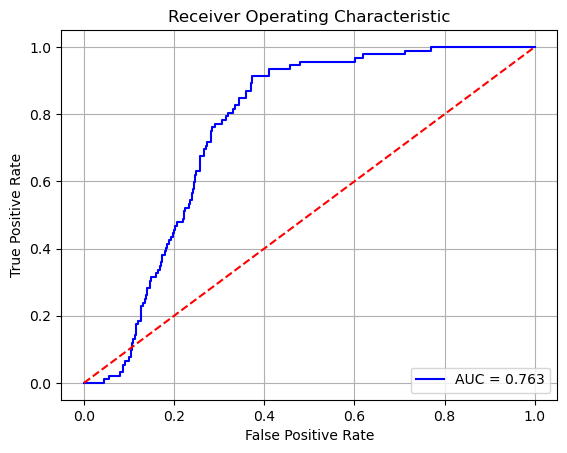

In [19]:
# Add code to evaluate predictions using ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_soft[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

#### Add comments on model evaluation and extended cross-validation


5. What was the cost of increasing the number of folds in terms of training run-time? <span style="color:red" float:right>[2 point]</span>

In [20]:
# Add code here to determine cost of increasing folds


#### Add comments on training run-time here


# End of assignment